In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
plt.style.use('fivethirtyeight')
import warnings
from IPython.display import Image  
import pydotplus
import graphviz
warnings.filterwarnings('ignore')
%matplotlib inline


# Welcome to your first project

### In this project we are going to take a look at the titanic dataset, where we have to predict who is going to die in the accident based on different variables.


In this problem we have to predict who is going to die in the titanic accident. The data has been captured after the disaster. 

It is a statistical dataset, each feature can be later used in your machine learning model.

In [2]:
# Loading a csv file with pandas
df = pd.read_csv('data/train.csv')

## How does the data look like?

We can see the structure of the table below. Most datasets have a combination of numeric, categorical and unstructured variables. We can see this is also the case below.

The label is binary (survived or not survived). Remember this when choosing a model. 

### Data Dictionary
VariableDefinitionKey 
- survival Survival 0 = No, 1 = Yes 
- pclass Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd 
- sex Sex Age Age in years 
- sibsp # of siblings / spouses aboard the Titanic 
- parch # of parents / children aboard the Titanic 
- ticket Ticket number 
- fare Passenger fare 
- cabin Cabin number 
- embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton



### Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

### Notes 

The survived column is what we want to predict, we want to predict if someone survived titanic or not.

The other columns (except for the index and the PassengerId) can be used to predict wether or not a passenger has survived.

A line of thought might be: 

- Maybe more females have survived titanic?
- Maybe younger passengers are more likely to survive titanic?
- Maybe more people of a certain Pclass have survived titanic?

In [3]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# Understanding the problem - Data Exploration

So as we can see we have a number of passengers, they all either survived or did not survive and our task is to predict from a set of people where we do not know from if they survived or not if they survived or not.

You might be wondering how can we do this?

In [4]:
# Let's look at some distributions
df.shape

(891, 12)

In [5]:
df.isnull().sum() #checking for total null values, eg. missing data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Age distribution')

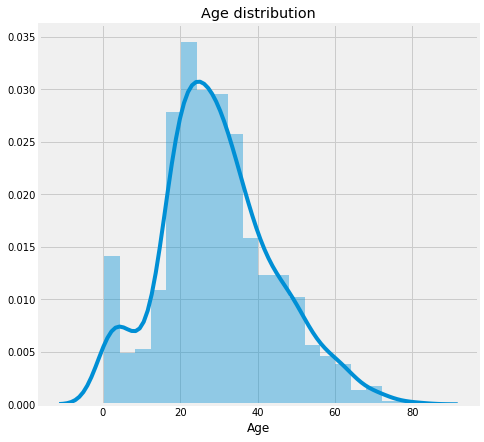

In [6]:
plt.figure(figsize=(7, 7))
ax = sns.distplot(df['Age'].dropna())
ax.set_title('Age distribution')

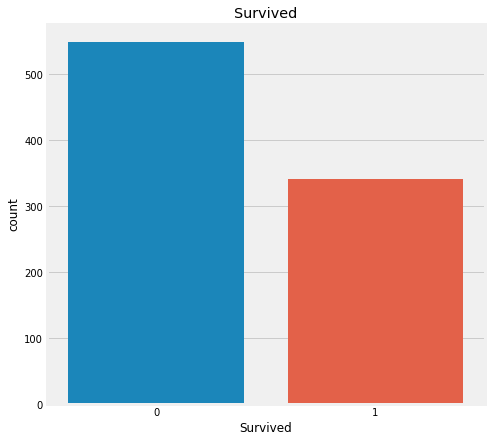

In [7]:
plt.figure(figsize=(7, 7))
ax = sns.countplot('Survived', data=df)
ax.set_title('Survived')
plt.show()

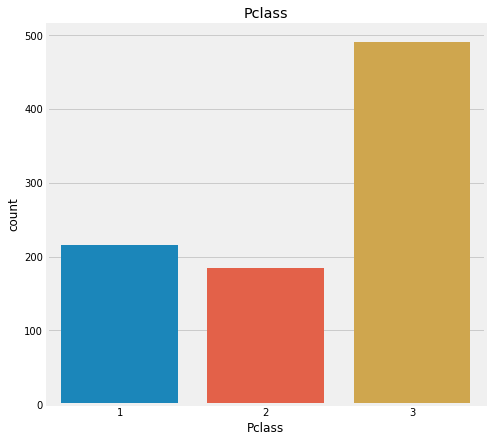

In [8]:
plt.figure(figsize=(7, 7))
ax = sns.countplot('Pclass', data=df)
ax.set_title('Pclass')
plt.show()

In [9]:
categorical_columns = ['Pclass', 'SibSp', 'Parch', 'Embarked', 'Sex']

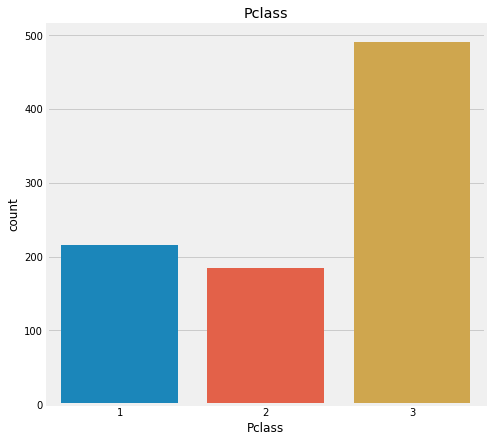

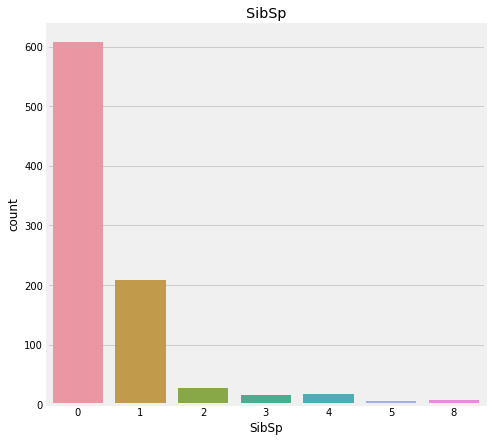

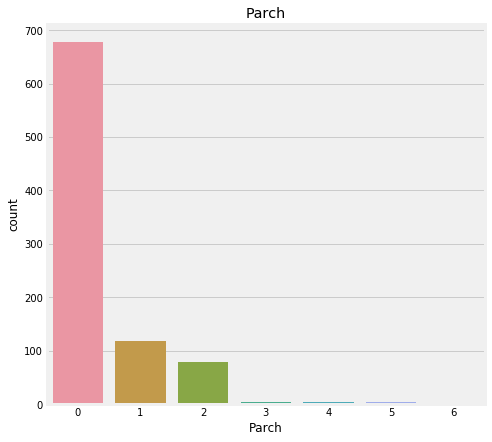

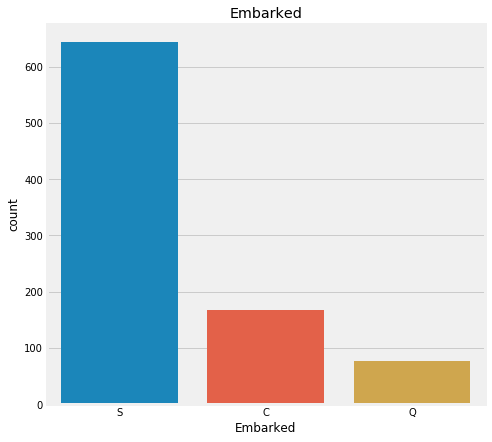

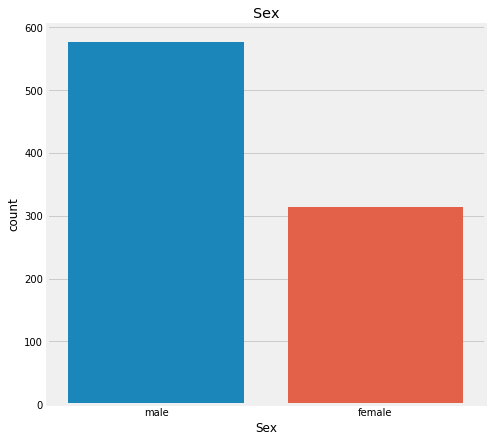

In [10]:
for col in categorical_columns:
    plt.figure(figsize=(7, 7))
    ax = sns.countplot(col, data=df)
    ax.set_title(col)
    plt.show()

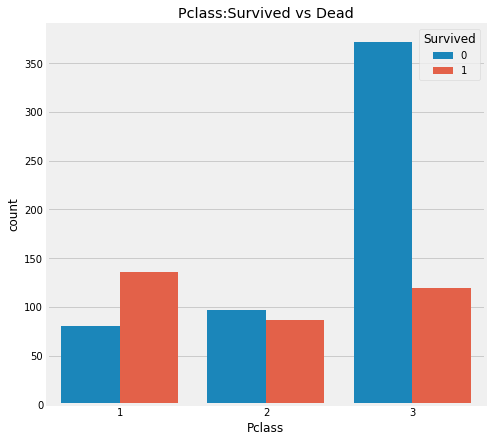

In [11]:
plt.figure(figsize=(7,7))
ax = sns.countplot('Pclass', hue='Survived', data=df)
ax.set_title('Pclass' + ':Survived vs Dead')
plt.show()

# Exercise: Try to understand the data

* Try to visualize more information of variables that I have not yet covered above
* Write down any interesting observations / correlations that you can find

# The naive way of doing it..

The naive way would be to figure out which variables are most important with regards to survival rate and make an algorithm to decide who survives or not based on those variables. So let's see how far we can get with a naive approach.

In [12]:
train, valid = train_test_split(df, random_state=1, stratify=df.Survived)

Let's say we would have to guess if someone died based on Pclass. 

We would just look at the graph above and do the best we can..

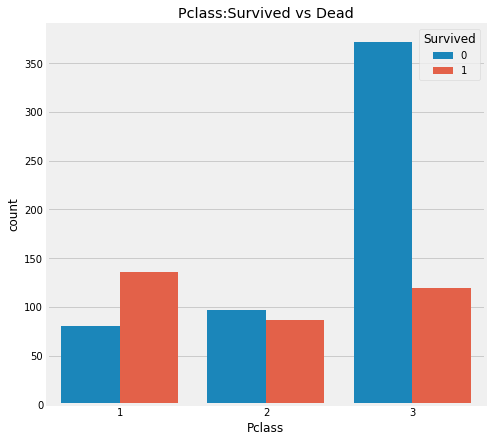

In [13]:
plt.figure(figsize=(7,7))
ax = sns.countplot('Pclass', hue='Survived', data=df)
ax.set_title('Pclass' + ':Survived vs Dead')
plt.show()

In [14]:
train.loc[train['Pclass'] == 3, 'pred'] = 0
train.loc[train['Pclass'] == 2, 'pred'] = 0
train.loc[train['Pclass'] == 1, 'pred'] = 1

In [46]:
accuracy_score(train['Survived'], train['pred'])

0.6856287425149701

We can already get a 68% accuracy score just by "smartly" classifying based on which class they travelled

Now let's try the same based on age

Text(0.5, 1.0, 'Age distribution')

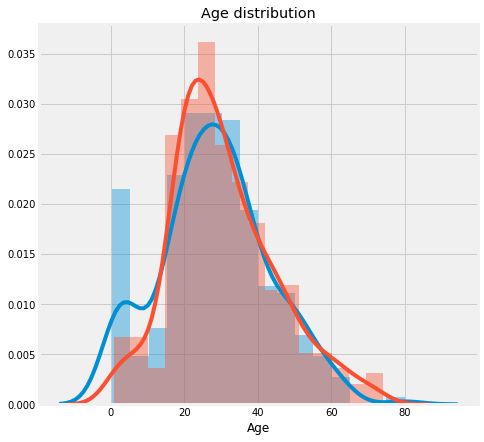

In [17]:
plt.figure(figsize=(7, 7))
ax = sns.distplot(df[df['Survived'] == 1].Age.dropna())
ax = sns.distplot(df[df['Survived'] == 0].Age.dropna())
ax.set_title('Age distribution')

In [18]:
train['pred'] = 0
train.loc[train['Age'] < 15, 'pred'] = 1
train.loc[train['Age'] >= 15, 'pred'] = 0

In [19]:
accuracy_score(train['Survived'], train['pred'])

0.6302395209580839

Now we already get a 63% accuracy score!

We can now also make it slightly more complicated by looking at two different variables. Maybe if we look at the Pclass and Age together we can make it even better!

In [23]:
train['is_child'] = (train['Age'] < 5).astype(int)

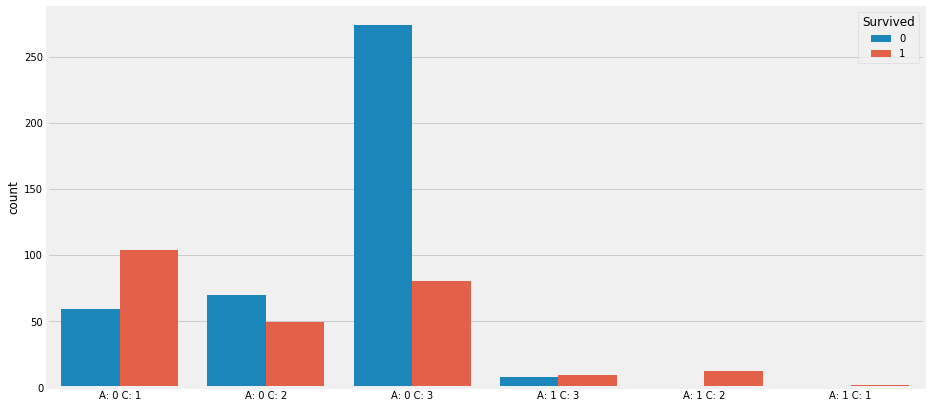

In [24]:
plt.figure(figsize=(14,7))
sns.countplot("A: " + train['is_child'].astype(str) + ' C: ' + train['Pclass'].astype(str), hue='Survived', data=df)
ax.set_title(col + ':Survived vs Dead')
plt.show()

In [25]:
train['pred'] = 0
train.loc[(train['is_child'] == 0) & (train['Pclass'] == 3), 'pred'] = 0
train.loc[(train['is_child'] == 0) & (train['Pclass'] == 2), 'pred'] = 0
train.loc[(train['is_child'] == 0) & (train['Pclass'] == 1), 'pred'] = 1

train.loc[(train['is_child'] == 1) & (train['Pclass'] == 3), 'pred'] = 1
train.loc[(train['is_child'] == 1) & (train['Pclass'] == 2), 'pred'] = 1
train.loc[(train['is_child'] == 1) & (train['Pclass'] == 1), 'pred'] = 1

In [26]:
accuracy_score(train['Survived'], train['pred'])

0.7050898203592815

Now we do slightly better then just looking at 1 variable!

Maybe adding even more variables might even improve the score further..?

## Exercise

Try to find a way to improve the score further! You can use other variables or add more!


# Cross validation

One of the most important concepts in data science is "generalizabillity", which means, how well does our model (algorithm) work on data that we have no labels for. 

In this case, howe well does i work on our "test" set, or the set that we do not determine our decisions on.

That brings us to cross validation, which is the method of testing how well your model works on unseen data.

Steps in cross validation:

- Load your dataset that includes labels
- Split your dataset into a training and validation set
- Create algorithm as best as you can on the training set
- Evaluate how well it performs on your validation set
- Now you have a real sense of how well it performs

In [27]:
accuracy_score(train['Survived'], train['pred'])

0.7050898203592815

Now the next step is to apply the same "algorithm" to our validation set test.

In [28]:
valid['is_child'] = (valid['Age'] < 12).astype(int)

In [29]:
valid.loc[(valid['is_child'] == 0) & (valid['Pclass'] == 3), 'pred'] = 0
valid.loc[(valid['is_child'] == 0) & (valid['Pclass'] == 2), 'pred'] = 0
valid.loc[(valid['is_child'] == 0) & (valid['Pclass'] == 1), 'pred'] = 1

valid.loc[(valid['is_child'] == 1) & (valid['Pclass'] == 3), 'pred'] = 1
valid.loc[(valid['is_child'] == 1) & (valid['Pclass'] == 2), 'pred'] = 1
valid.loc[(valid['is_child'] == 1) & (valid['Pclass'] == 1), 'pred'] = 1

In [30]:
accuracy_score(valid['Survived'], valid['pred'])

0.6681614349775785

The accuracy score is quite close to our training set, meaning the training set is similar to our test set, which is a good thing. 

If these two scores are widely different, there is a difference between our training set and test set, which might indicate that our algorithm will not perform as well as we would think it would.

Even here we can see a difference, which means there is definately a slight difference between the train and the test set, and might have over-optimized on our training set characteristics

# Wouldn't it be nice if we can automatically combine different variables in a way that we are most accurate?

That's exactly what machine learning tries to do!

But before we can apply machine learning, we have to prepare our data.

- Deal with missing values
- Make all variables numeric

In [31]:
# Loading a csv file with pandas
df = pd.read_csv('data/train.csv')

In [32]:
# Remove null values
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [33]:
# Set PassengerId as index of the dataframe
df.set_index('PassengerId', inplace=True)

In [34]:
# Select columns we want to use in our machine learning model
df_filtered = df[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Age']]

In [35]:
# One-hot-encode our dataframe, in order to create variables out of categorical columns and make 
# the columns numeric
df_filtered = pd.get_dummies(df_filtered, columns=['Sex', 'Embarked', 'Pclass'])

In [36]:
# Select our columns after one hot encoding
cols = list(df_filtered.columns)
label = 'Survived'
cols.remove(label)
feature_cols = cols

In [37]:
# Split dataset in train and validation set
train, valid = train_test_split(df_filtered, random_state=1)

In [38]:
train_features = train[feature_cols]
target = train[label]

In [39]:
clf = tree.DecisionTreeClassifier(max_depth=2, min_samples_split=100)
clf = clf.fit(train_features, target)

In [40]:
accuracy_score(target, clf.predict(train_features))

0.8143712574850299

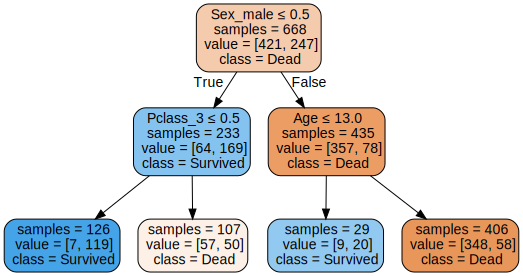

In [41]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=feature_cols,  
                 class_names=['Dead', 'Survived'], 
                                filled=True, rounded=True,  
                   special_characters=True, leaves_parallel=True,
                                impurity=False) 
graph = graphviz.Source(dot_data) 
graph

In [42]:
valid_features = valid[feature_cols]

In [43]:
preds = clf.predict(valid_features)

In [44]:
valid['preds'] = preds

In [45]:
accuracy_score(valid['Survived'], valid['preds'])

0.726457399103139

# Exercise: How can we make it even better?

Usually there are a few ways to make it even better:

- Add more features
- Use a better model
- Optimize the hyperparameters of the current model (eg. depth, min_features_split)
- Deal with null values in a better way